<a href="https://colab.research.google.com/github/Kaiziferr/machine_learning/blob/main/EDA/confounding/01_workshop_confounding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install pingouin

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pingouin as pg

# **Método para la detección de variable confusa atrevés de la correlación lineal**
---



In [3]:
url = 'https://raw.githubusercontent.com/JoaquinAmatRodrigo/Estadistica-machine-learning-python/master/data/Cars93.csv'
data = pd.read_csv(url)

In [4]:
data.head(2)

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend


- Se introduce la variable de confusión

In [5]:
data['log_price'] = np.log(data['Price'])

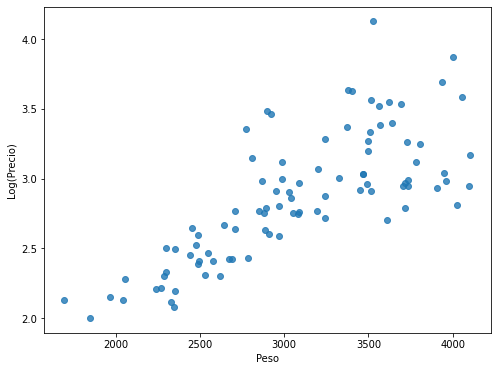

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.scatter(x=data.Weight, y=data.log_price, alpha= 0.8)
ax.set_xlabel('Peso')
ax.set_ylabel('Log(Precio)');

# **Correlación Lineal**
---

In [7]:
pg.corr(x = data['Weight'], y = data['log_price'], method='pearson')

,n,r,CI95%,p-val,BF10,power
pearson,93,0.763544,"[0.66, 0.84]",5.640674e-19,1.069e+16,1.0


- La correlación entre el peso y el logaritmo de peso es alta r = 0.763544 y significativa p ≈ 0.

# **Correlación Parcial**
---



- Se bloquea la variable potencia del motor

In [8]:
pg.partial_corr(data=data, x='Weight', y='log_price', covar='Horsepower', method='pearson')

,n,r,CI95%,p-val
pearson,93,0.404741,"[0.22, 0.56]",0.000063


- Bloqueando la variable potencia de motor reduce la correlación (r=0.404741)

# **Conclusión**
---
- Se puede concluir que existe una relación lineal entre el peso y el logaritmo del precio, se encuentra influenciada por el efecto de la variable potencia de motor.


# **Referencias**
---

- https://www.cienciadedatos.net/documentos/pystats05-correlacion-lineal-python.html

# **Utilidades**
---



In [9]:
def confounding_variable_detection(data, x, y, **kwargs):
  result = pd.DataFrame(columns=['confounding','n','r','CI95%','p-val'])
  if kwargs and kwargs['confounding']:
    result = pg.partial_corr(data=data, x='Weight', y='log_price', covar='Horsepower', method='pearson')
  else:
    for d in data:
      if d not in [x, y]:
        try:
          temp = pg.partial_corr(data=data, x='Weight', y='log_price', covar=str(d), method='pearson')
          temp['confounding'] = d
          result = pd.concat([result, temp], axis = 0)
        except Exception as e:
          pass
  return result

In [10]:
confounding_variable_detection(data, 'Weight', 'log_price')

,confounding,n,r,CI95%,p-val
pearson,Min.Price,93,0.551195,"[0.39, 0.68]",1.243560e-08
pearson,Price,93,0.655963,"[0.52, 0.76]",1.274079e-12
pearson,Max.Price,93,0.678362,"[0.55, 0.78]",1.091905e-13
pearson,MPG.city,93,0.433241,"[0.25, 0.59]",1.605768e-05
pearson,MPG.highway,93,0.517517,"[0.35, 0.65]",1.274398e-07
pearson,EngineSize,93,0.501207,"[0.33, 0.64]",3.603602e-07
pearson,Horsepower,93,0.404741,"[0.22, 0.56]",6.288649e-05
pearson,RPM,93,0.811085,"[0.73, 0.87]",1.125426e-22
pearson,Rev.per.mile,93,0.648485,"[0.51, 0.75]",2.765272e-12
pearson,Fuel.tank.capacity,93,0.368454,"[0.18, 0.53]",3.017622e-04


In [11]:
confounding_variable_detection(data, 'Weight', 'log_price', **{'confounding':'Horsepower'})

,n,r,CI95%,p-val
pearson,93,0.404741,"[0.22, 0.56]",0.000063
